In [1]:
import os
import tensorflow as tf

from lob.lob_gan import *

%load_ext autoreload
%autoreload 2

imported at 2025-04-20 00:43:43.595490


In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
RAW_DATA = pd.read_parquet('lob/BTCUSDT-lob.parq', engine='pyarrow')
assert RAW_DATA.notna().all(axis=None)
RAW_DATA

,E,T,U,u,pu,b0p,b1p,b2p,b3p,b4p,...,a0q,a1q,a2q,a3q,a4q,a5q,a6q,a7q,a8q,a9q
0,1739868923498,1739868923498,6783640382776,6783640393900,6783640382281,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.937,0.190,0.036,0.002,0.095,0.002,0.002,0.002,0.158,0.002
1,1739868923614,1739868923610,6783640396586,6783640404328,6783640393900,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.953,0.154,0.002,0.095,0.002,0.002,0.002,0.158,0.002,0.002
2,1739868923724,1739868923721,6783640405138,6783640420666,6783640404328,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.953,0.154,0.042,0.002,0.095,0.002,0.002,0.002,0.158,0.004
3,1739868923827,1739868923821,6783640421340,6783640434389,6783640420666,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.953,0.154,0.042,0.002,0.095,0.002,0.002,0.002,0.158,0.004
4,1739868923948,1739868923946,6783640436896,6783640445572,6783640434389,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.957,0.154,0.042,0.002,0.095,0.002,0.002,0.002,0.158,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189755,1739937377488,1739937377486,6791359179849,6791359186272,6791359179542,95733.3,95733.2,95733.1,95733.0,95732.9,...,0.884,0.007,0.002,0.014,0.050,0.002,0.002,0.002,0.002,0.010
189756,1739937377596,1739937377595,6791359186752,6791359194092,6791359186272,95733.3,95733.2,95733.1,95733.0,95732.9,...,1.438,0.007,0.002,0.014,0.050,0.002,0.002,0.002,0.002,0.010
189757,1739937377698,1739937377697,6791359194379,6791359202977,6791359194092,95733.3,95733.2,95733.1,95733.0,95732.9,...,5.604,0.007,0.002,0.014,0.002,0.050,0.002,0.002,0.002,0.002
189758,1739937377806,1739937377806,6791359203537,6791359209077,6791359202977,95733.3,95733.2,95733.1,95733.0,95732.9,...,5.453,0.007,0.002,0.014,0.002,0.050,0.002,0.002,0.002,0.002


In [4]:
%%time

SAMPLE_SIZE = min(len(RAW_DATA), Configs().sample_size)
BATCH_SIZE = SAMPLE_SIZE // Configs().n_batches

LOB_DATASET = create_dataset(RAW_DATA, sample_size=SAMPLE_SIZE, batch_size=BATCH_SIZE)

CPU times: user 21.1 ms, sys: 9.28 ms, total: 30.4 ms
Wall time: 29.7 ms


{'neg_qty_sum': 0.0,
 'neg_qty_count': 0.0,
 'neg_diff_sum': 0.0,
 'neg_diff_count': 0.0}

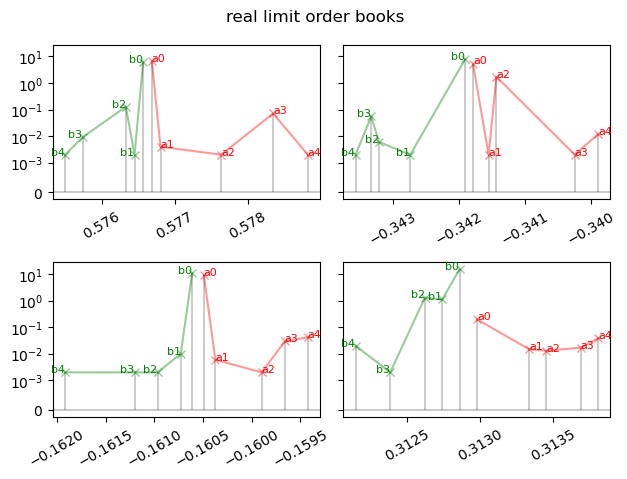

CPU times: user 1.09 s, sys: 84.1 ms, total: 1.18 s
Wall time: 544 ms


In [5]:
%%time

for i, batch in enumerate(LOB_DATASET):
    ss = calculate_sample_stats(batch)
    display(ss)
    f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharey=True)
    f.suptitle('real limit order books')
    plot_lob_snapshot(batch[0], ax0)
    plot_lob_snapshot(batch[1], ax1)
    plot_lob_snapshot(batch[2], ax2)
    plot_lob_snapshot(batch[3], ax3)
    plt.tight_layout()
    plt.show()
    break

batch_size=1250


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:56<00:00,  1.13it/s]

Training completed in 0.95 minutes
plot_training_history


,disc_loss,real_loss,fake_loss,gen_loss,adv_loss,fm_loss_h,fm_loss_e,real_prob,fake_prob,neg_qty_sum,neg_qty_count,neg_diff_sum,neg_diff_count
0,2.505154,1.022169,1.482985,3.575568,3.575568,0.0,0.0,0.468780,0.742764,2.536906,3.6440,24.911442,18.870399
1,3.102928,0.441144,2.661784,1.023559,1.023559,0.0,0.0,0.676219,0.914938,3.847440,3.1600,43.843262,17.707199
2,3.123117,0.245312,2.877805,0.794696,0.794696,0.0,0.0,0.795760,0.930431,4.832216,2.3976,65.699852,17.648800
3,2.599987,0.211381,2.388607,1.389060,1.389060,0.0,0.0,0.819996,0.888952,6.830692,2.1984,110.086845,20.002399
4,1.551332,0.231379,1.319953,5.237249,5.237249,0.0,0.0,0.805247,0.671884,12.625583,2.8064,177.817688,20.408800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.153848,0.150060,0.003788,272892.363281,272892.363281,0.0,0.0,0.869809,0.000050,29092.742188,4.0000,168475.546875,19.000000
60,0.147302,0.147302,0.000000,270151.908203,270151.908203,0.0,0.0,0.871953,0.000000,31290.703125,4.0000,160738.015625,18.000000
61,0.138718,0.135361,0.003357,260541.800781,260541.800781,0.0,0.0,0.881707,0.000050,32371.193359,4.0000,154469.140625,18.000000
62,0.134322,0.134322,0.000000,257501.324219,257501.324219,0.0,0.0,0.882470,0.000000,33029.843750,4.0000,148258.812500,18.000000


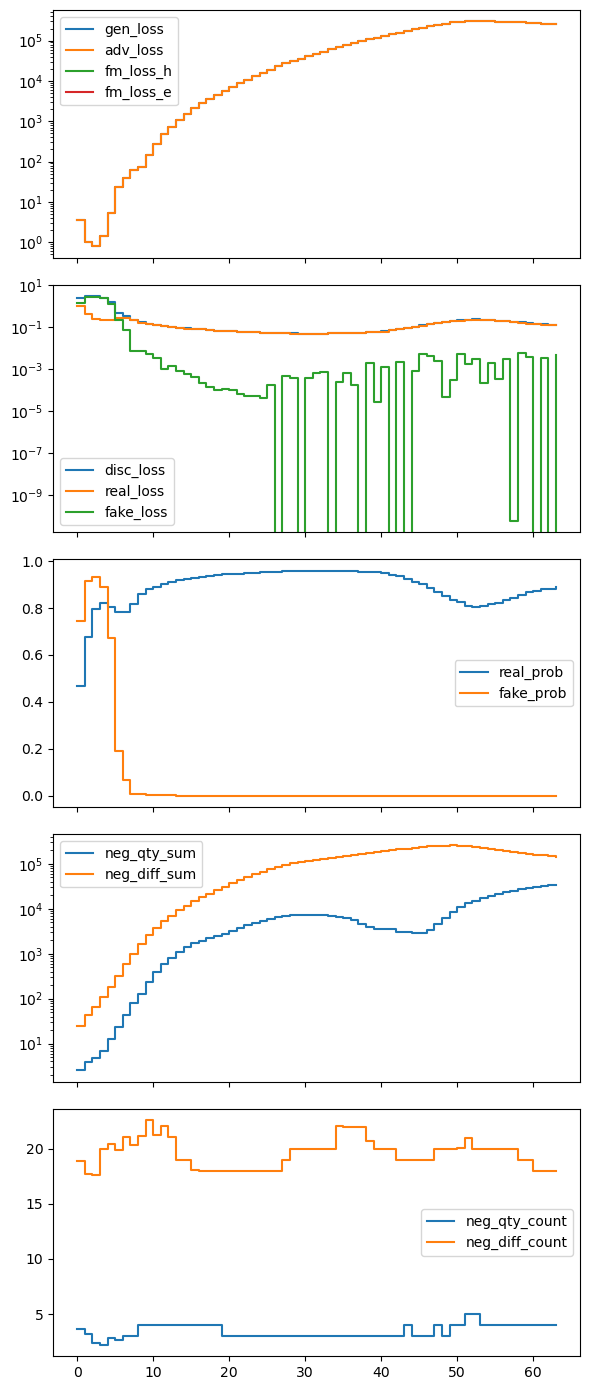

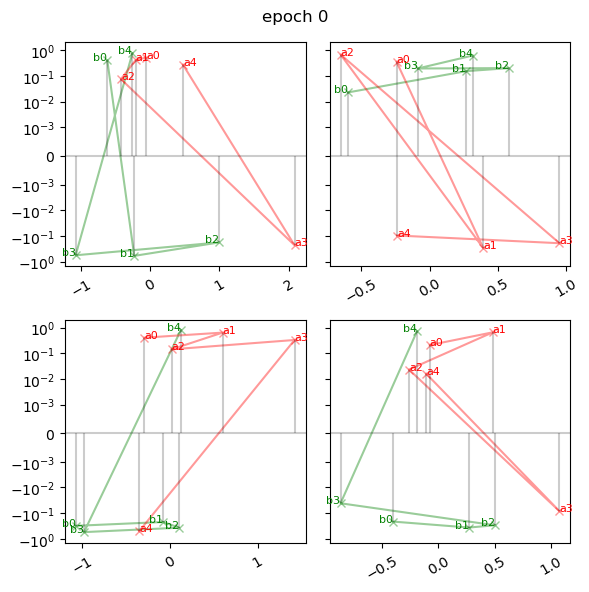

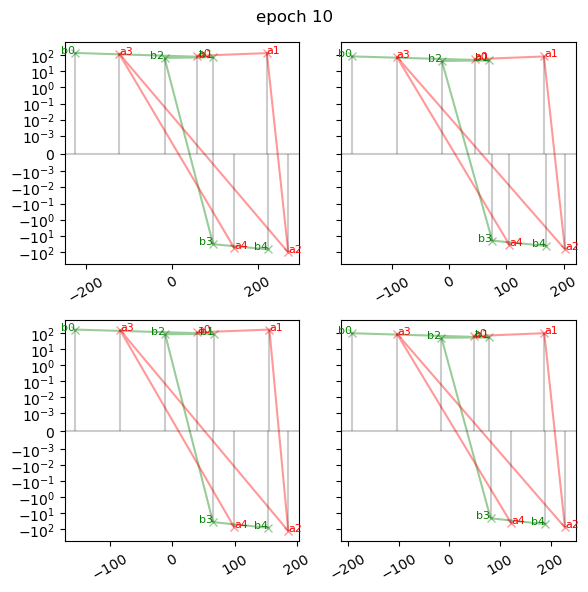

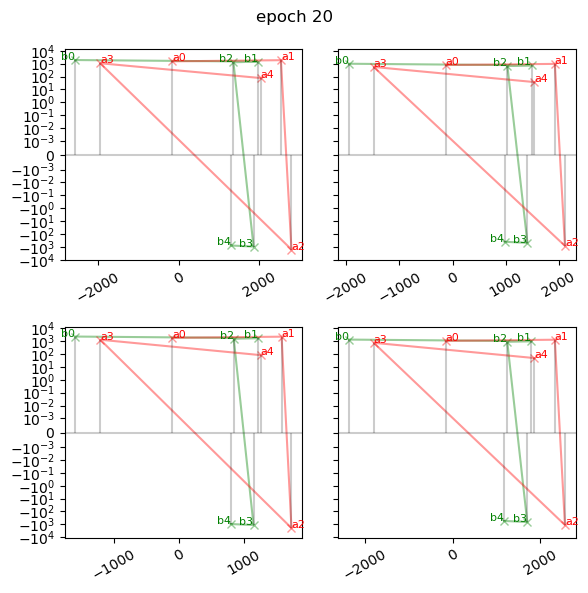

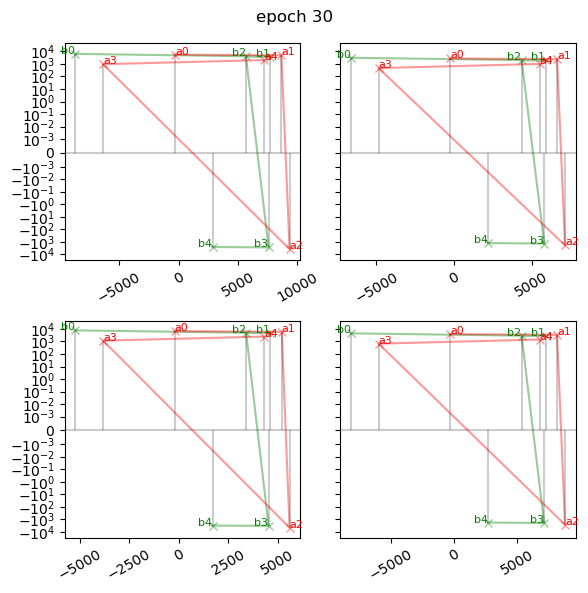

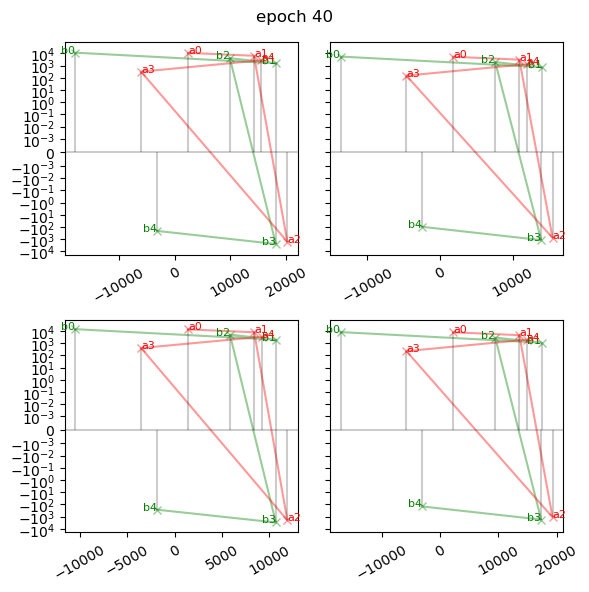

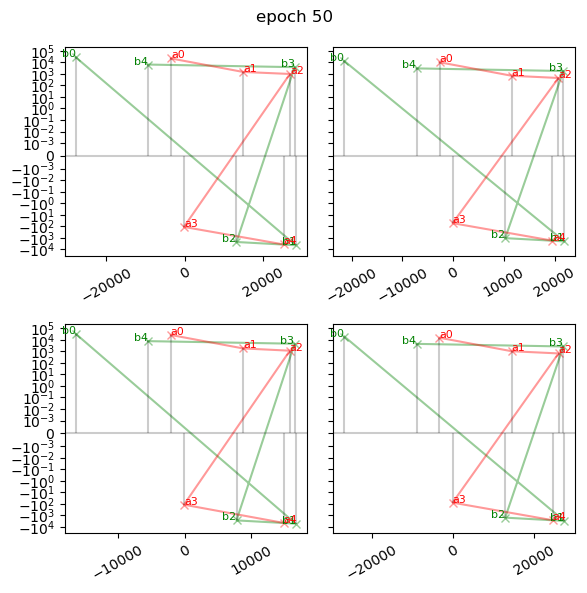

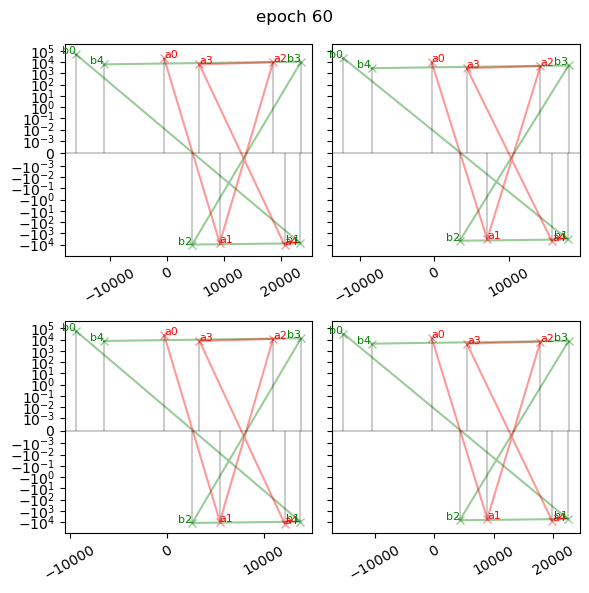

In [6]:
gan = ImprovedGAN(RAW_DATA, Configs())
outputs = gan.train()
plot_training_history(outputs.metrics)
plot_lobs(outputs.lobs)

In [ ]:
gan = ImprovedGAN(RAW_DATA, Configs(fm_weight_h=1.0, fm_weight_e=1.0))
outputs = gan.train()
plot_training_history(outputs.metrics)
plot_lobs(outputs.lobs)

batch_size=1250


 23%|█████████████████████████████████████████████▋                                                                                                                                                     | 15/64 [00:19<00:53,  1.10s/it]